# CNN Flower Classificaion

### Imports

In [111]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Importing validation and train dataset

In [112]:
base_dir = '..\\flower_classification_CNN\\flower_photos'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
print(train_dir)

..\flower_classification_CNN\flower_photos\train


In [117]:
image_gen = ImageDataGenerator(  rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data = image_gen.flow_from_directory(batch_size=100, 
                                            directory=train_dir, 
                                            shuffle=True, 
                                            target_size=(150,150),
                                            class_mode='sparse')
print(train_data)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


# augmented_images = [train_data[0][0][0] for i in range(5)]
# plotImages(augmented_images)

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=100,
                                                 directory=val_dir,
                                                 target_size=(150, 150),
                                                 class_mode='sparse')

Found 2935 images belonging to 5 classes.
Found 735 images belonging to 5 classes.


### Creating Model

In [118]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

### Compiling Model

In [119]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 128)     

In [120]:

classes = ['daisy','dandelion','roses','sunflowers','tulips']
history = model.fit(
    train_data,
    steps_per_epoch=int(np.ceil(train_data.n / float(100))),
    epochs=80,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(100)))
)

Epoch 1/80
30/30 [==============================] - 48s 2s/step - loss: 1.5074 - accuracy: 0.3635 - val_loss: 1.4289 - val_accuracy: 0.4707
Epoch 2/80
30/30 [==============================] - 43s 1s/step - loss: 1.4571 - accuracy: 0.4412 - val_loss: 1.3956 - val_accuracy: 0.5048
Epoch 3/80
30/30 [==============================] - 39s 1s/step - loss: 1.4159 - accuracy: 0.4872 - val_loss: 1.3587 - val_accuracy: 0.5374
Epoch 4/80
30/30 [==============================] - 40s 1s/step - loss: 1.4040 - accuracy: 0.4937 - val_loss: 1.3516 - val_accuracy: 0.5524
Epoch 5/80
30/30 [==============================] - 40s 1s/step - loss: 1.3741 - accuracy: 0.5271 - val_loss: 1.3533 - val_accuracy: 0.5456
Epoch 6/80
30/30 [==============================] - 40s 1s/step - loss: 1.3629 - accuracy: 0.5359 - val_loss: 1.3168 - val_accuracy: 0.5823
Epoch 7/80
30/30 [==============================] - 39s 1s/step - loss: 1.3482 - accuracy: 0.5520 - val_loss: 1.2995 - val_accuracy: 0.6000
Epoch 8/80
30/30 [==

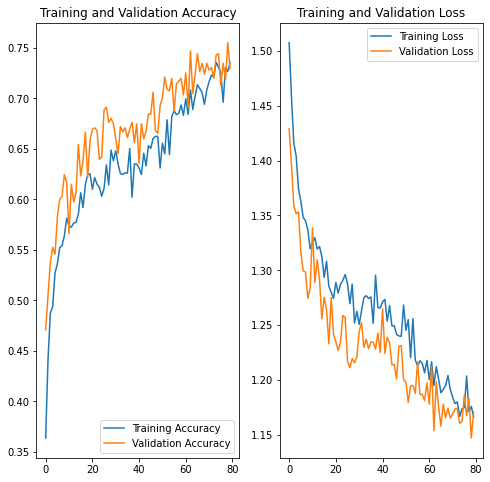

In [121]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(80)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()